In [1]:
### Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

            Time Event
0    2485.912000    ON
2    2488.285984    ON
4    2489.452992    ON
6    2492.141984    ON
8    2494.830976    ON
..           ...   ...
724  3391.276000    ON
726  3393.696992    ON
728  3396.008992    ON
730  3399.476000    ON
732  3402.853984    ON

[367 rows x 2 columns]


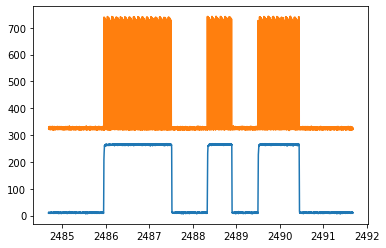

In [40]:
### Load corr streams and plot
headset_stream = pd.read_csv('Data230328b/headset-stream.csv')
headset_stream = headset_stream.rename(columns={headset_stream.columns[0]: "Time", headset_stream.columns[1]: "Value"})
screen_stream = pd.read_csv('Data230328b/screen-stream.csv')
screen_stream = screen_stream.rename(columns={screen_stream.columns[0]: "Time", screen_stream.columns[1]: "Value"})
zmq_events = pd.read_csv('Data230328b/zmq-events.csv')
zmq_events.columns = ["Time", "Event"]
zmq_events_on = zmq_events[zmq_events["Event"] == 'ON']

print(zmq_events_on)
zmq_on_times = np.array(zmq_events_on["Time"])

plt_range = (8000, 15000)
plt.figure()
plt.plot(screen_stream["Time"][plt_range[0]:plt_range[1]], screen_stream["Value"][plt_range[0]:plt_range[1]])
plt.plot(headset_stream["Time"][plt_range[0]:plt_range[1]], headset_stream["Value"][plt_range[0]:plt_range[1]] + 50)

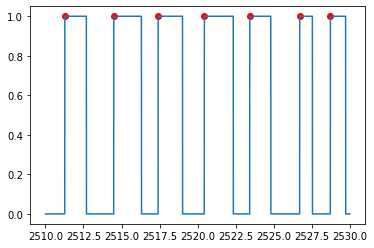

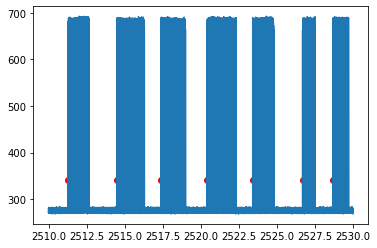

In [24]:
### Extract ON times for each stream

screen_signal = np.array(screen_stream["Value"])
screen_time = np.array(screen_stream["Time"])
headset_signal = np.array(headset_stream["Value"])
headset_time = np.array(headset_stream["Time"])

# Binarise screen signal and find peaks
screen_signal[screen_signal < 25] = 0
screen_signal[screen_signal > 0] = 1
screen_on, props = find_peaks(np.diff(screen_signal))
screen_on_times = screen_time[screen_on]

# Preview
prev_window = (2510, 2530)
plt.figure()
plt.plot(screen_time[(screen_time > prev_window[0]) & (screen_time < prev_window[1])], screen_signal[(screen_time > prev_window[0]) & (screen_time < prev_window[1])])
plt.scatter(screen_on_times[(screen_on_times > prev_window[0]) & (screen_on_times < prev_window[1])], np.ones((1, len(screen_on_times[(screen_on_times > prev_window[0]) & (screen_on_times < prev_window[1])]))), c='r')

# Get corresponding ON pulse for headset
headset_on_times = []
for t in screen_on_times:
    headset_window = headset_signal[(headset_time > (t - 0.1)) & (headset_time < (t + 0.1))]
    headset_window_time = headset_time[(headset_time > (t - 0.1)) & (headset_time < (t + 0.1))]

    onset = np.where(headset_window > 285)[0][0]
    onset_time = headset_window_time[onset]
    headset_on_times.append(onset_time)

headset_on_times = np.array(headset_on_times)

# Preview
plt.figure()
plt.plot(headset_time[(headset_time > prev_window[0]) & (headset_time < prev_window[1])], headset_signal[(headset_time > prev_window[0]) & (headset_time < prev_window[1])])
plt.scatter(headset_on_times[(headset_on_times > prev_window[0]) & (headset_on_times < prev_window[1])], np.ones((1, len(headset_on_times[(headset_on_times > prev_window[0]) & (headset_on_times < prev_window[1])]))) * 340, c='r')

(array([ 5., 34., 37., 60., 32., 52., 44., 30., 44., 29.]),
 array([-7.96800000e-03, -5.96800000e-03, -3.96800000e-03, -1.96800000e-03,
         3.20000001e-05,  2.03200000e-03,  4.03200000e-03,  6.03200000e-03,
         8.03200000e-03,  1.00320000e-02,  1.20320000e-02]),
 <BarContainer object of 10 artists>)

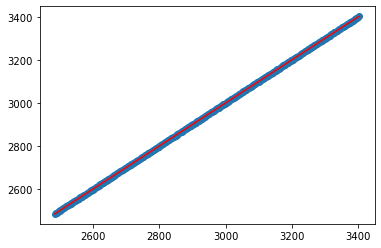

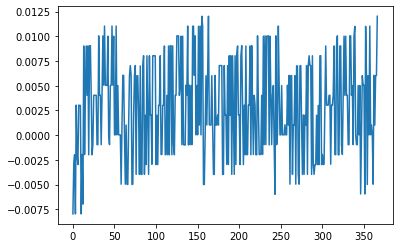

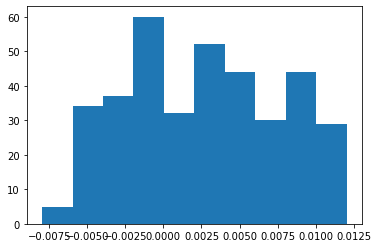

In [44]:
# Correlate, compare
plt.figure()
plt.scatter(screen_on_times, headset_on_times)
plt.plot(screen_on_times, screen_on_times, c='r')

time_diff_hs = screen_on_times - headset_on_times

plt.figure()
plt.plot(time_diff_hs)

plt.figure()
plt.hist(time_diff_hs)

(array([ 8., 37., 43., 45., 49., 27., 57., 33., 52., 16.]),
 array([0.040032, 0.042032, 0.044032, 0.046032, 0.048032, 0.050032,
        0.052032, 0.054032, 0.056032, 0.058032, 0.060032]),
 <BarContainer object of 10 artists>)

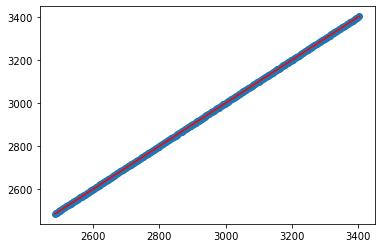

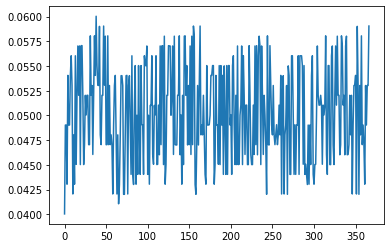

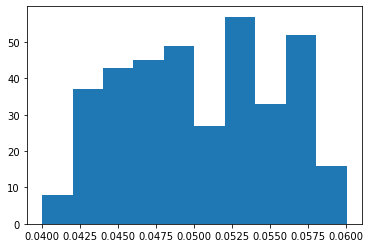

In [46]:
# ZMQ events
plt.figure()
plt.scatter(zmq_on_times, screen_on_times)
plt.plot(screen_on_times, screen_on_times, c='r')

time_diff_zs = screen_on_times - zmq_on_times

plt.figure()
plt.plot(time_diff_zs)

plt.figure()
plt.hist(time_diff_zs)

(array([  3.,   6.,  28., 156., 133.,  28.,   5.,   5.,   2.,   1.]),
 array([0.044    , 0.0449024, 0.0458048, 0.0467072, 0.0476096, 0.048512 ,
        0.0494144, 0.0503168, 0.0512192, 0.0521216, 0.053024 ]),
 <BarContainer object of 10 artists>)

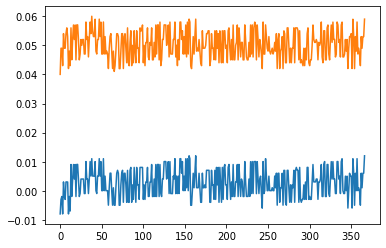

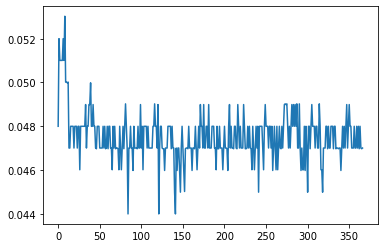

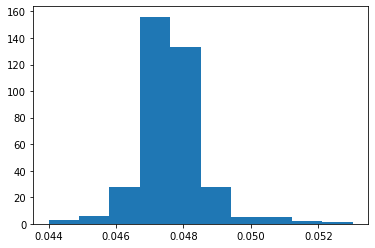

In [49]:
#
plt.figure()
plt.plot(time_diff_hs)
plt.plot(time_diff_zs)

offset_time = time_diff_zs - time_diff_hs

plt.figure()
plt.plot(offset_time)

plt.figure()
plt.hist(offset_time)